In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from scipy import misc
from IPython.display import Image
from IPython.display import display
from sklearn.metrics import silhouette_score

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 19 days


In [2]:
import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels):
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(plt_labels).size

    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (plt_labels == k)
        plt.plot(X[plt_labels == -1, 0], X[plt_labels == -1, 1], linestyle = 'None', markerfacecolor = 'black', marker = 'o')
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')

    plt.show()

In [3]:
path = "/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube"
img = np.fromfile(path, dtype=np.int16).reshape([285,1500,1000]).transpose([1,2,0])
print img.shape

X = img.reshape((1500*1000),285)

(1500, 1000, 285)


In [4]:
k_means = KMeans(init='k-means++', n_clusters=10, n_init=1)
k_means.fit(X)
#print "Silhoute: ",silhouette_score(X, k_means.labels_) #tez memory error
XX = k_means.labels_.reshape(1500,1000)

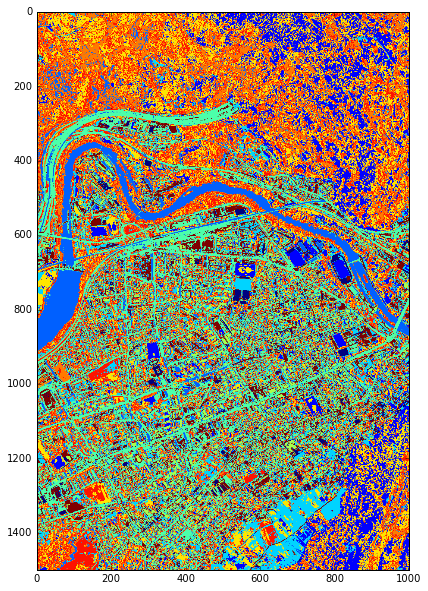

In [5]:
plt.figure(figsize=(15,10))
plt.imshow(XX)

/pio/os/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)


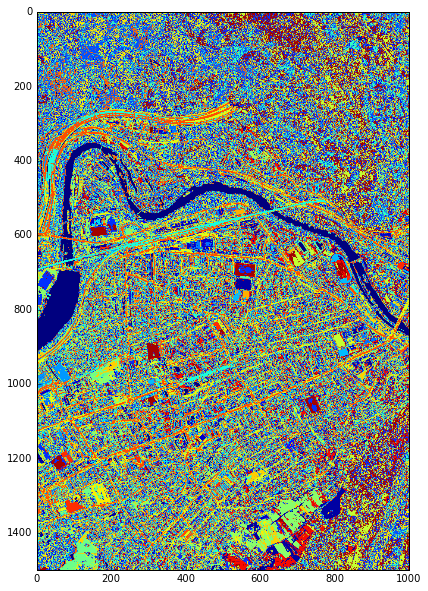

In [4]:
k_means = KMeans(init='k-means++', n_clusters=30, n_init=1, n_jobs=-2)
k_means.fit(X)
#print "Silhoute: ",silhouette_score(X, k_means.labels_) #tez memory error
YY = k_means.labels_.reshape(1500,1000)
plt.figure(figsize=(15,10))
plt.imshow(YY)

In [5]:
np.save('labels30',k_means.labels_)

In [30]:
arr = np.fromfile('labels30.npy',dtype = np.int32)
print type(k_means.labels_[0])
print arr[20:],len(arr)
print k_means.labels_
arr2 = arr[20:]
print arr2

<type 'numpy.int32'>
[12  6 23 ..., 28  5  5] 1500020
[12  6 23 ..., 28  5  5]
[12  6 23 ..., 28  5  5]


In [17]:
rozmiary = np.zeros(31)
for x in arr[20:]:
    rozmiary[x] += 1
print rozmiary
print rozmiary[0]
    

[  52302.   41711.   42544.   86975.   11511.  119243.   67237.   53823.
   49255.   10794.   24382.   50585.   84524.   13272.   62983.   80854.
    3359.   41017.   81253.  116957.   62034.    3678.   22581.   46538.
   84956.   24679.   55516.    8773.   96250.     414.       0.]
52302.0


In [29]:
mat = np.array([[1,2],[2,3]])
print mat.reshape(4,1)[1],mat.shape
print X[1].shape

[2] (2, 2)
(285,)


In [61]:
import matplotlib.colors as col
def kolor(i):
    cc = col.ColorConverter()
    if( i == 5 or i == 12 or i == 19 or i == 28 or i == 3):
        return(0.0,0.5,0.0)
    if( i == 15 ): 
        return cc.to_rgb('#C0C0C0')
    if( i == 18 or i == 24): 
        return (1.0,1.0,1.0)
    if( i == 0 ): 
        return (0.0,0.0,1.0)
    if( i == 6 ): 
        return (0.0,0.3,0.0)
    if( i == 14 ): 
        return (0.7,0.0,0.0)
    if( i == 20 ): 
        return (0.4,0.0,0.0)
    if( i == 7 ):
        return (1.0,0.0,0.0)

    return cc.to_rgb('k')

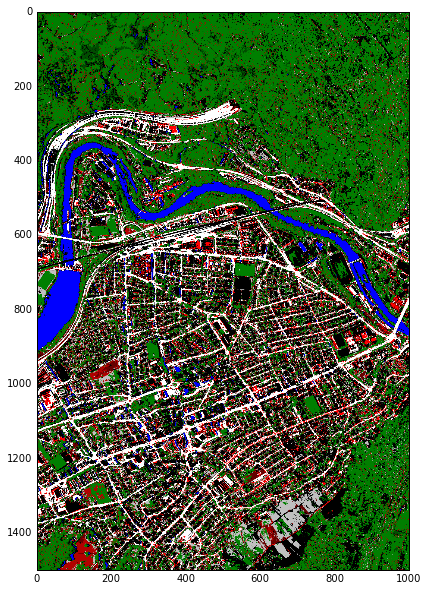

In [62]:
pomoc = np.empty((1500*1000,3))
#print pomoc
#print pomoc.reshape(6,4,3)
for i in range(1500*1000):
    pomoc[i] = kolor(arr2[i])
new_img = pomoc.reshape(1500,1000,3)
plt.figure(figsize=(15,10))
plt.imshow(new_img)    

In [65]:
def distance(x,y):
    return np.sqrt(np.sum(x**2,axis = 1,keepdims = True) + np.sum(y**2,axis = 1,keepdims = True).T - 2*np.dot(x,y.T))

def dunn_index(X,labels):
    k = (np.unique(labels) >= 0).sum()
    intra = np.max([np.max(distance(X[labels == i], X[labels == i])) for i in range(k)])
    inter = np.min([np.min(distance(X[labels == i], X[labels == j])) for i in range(k) for j in range(i+1,k)])
    return inter/intra